# Data exploration and editing
You will be demonstrating model building on freely available datasets.

Very often, raw data contains errors, some data is missing, data is in the wrong format, etc.

It is always a good idea to understand the data before you start working with it, and to adjust it if necessary.

There are a number of freely available data sources on the internet that you can test your skills on.
- https://archive.ics.uci.edu/ml/index.php
- https://www.kaggle.com/
- https://toolbox.google.com/datasetsearch
- github datasets

## Boston Housing Dataset

The housing dataset is derived from housing information for the Boston, Massachusetts area collected by the U.S. Census Bureau.  

The data were originally published in an article by Harrison, D. and Rubinfeld, D.L. `Hedonic prices and the demand for clean air', J. Environ. Economics & Management, vol.5, 81-102, 1978. 

The dataset contains information on 506 different homes in Boston.

Dataset features
* CRIM - crime rate per capita by city
* ZN - the proportion of residential lots over 25,000 square feet.
* INDUS - share of non-commercial business space per city
* CHAS - Charles River dummy variable (1 if the tract borders a river; 0 otherwise)
* NOX - nitrogen oxide concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - percentage of owner-occupied units built before 1940
* DIS - weighted distances to Boston's five employment centers
* RAD - accessibility index to radial freeways
* TAX - full property tax rate per $10,000 of assessed value
* PTRATIO - pupil-teacher ratio by city
* B - 1000(Bk - 0.63)^2, where Bk is the proportion of blacks in each city.
* LSTAT - percentage of lower status population
* MEDV - median value of owner-occupied housing in $1000

## Reading data from CSV file

In [1]:
import pandas as pd 

In [2]:
data = pd.read_csv ("..\\dataset\\HousingData.csv")

Let's look at the structure of the file.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


## Basic data characteristics

It is useful to have an overview of the input data before creating the model.
This can prevent problems later on. For example, some models require specific data.

Data preview.

In [4]:
data.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,NaN,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,NaN,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


Basic statistics of the data in columns are displayed using the **describe** function
- number of records
- mean value - average
- variance
- minimum
- 25% percentile
- 50% percentile - median
- 75% percentile
- maximum

For some columns the mean and median differ significantly - CRIM, ZN

For some columns, the mean and median are similar - RM

This will be clearly visible when the distribution of values is displayed.

In [5]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Some columns contain NULL data. We need to decide how to solve this problem.
* Incomplete rows can be removed from the dataset
* Problematic columns should not be input parameters to the model
* Missing values could be produced as average, zeros, ...
*...

In [6]:
data.isna().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

## Value distribution

Visualizing the distribution of data in columns could reveal skewed, abnormal values.

At the same time, some statistical methods may not work properly on atypically distributed data.

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

The distribution of the data can be well understood from the graphs.

We will create a graph that combines a histogram with an estimate of the distribution function.

We obtain the distribution function estimate using the seaborn library and the kernel density estimate line.

From the plots, we can see that some variables have almost normal distributions (RM), while others have almost uniform distributions (NOX). 

Some variables have a large representation of small values and high values are almost absent in the dataset (CRIM).

For some variables, we can see that the maximum values are much represented (B, TAX).

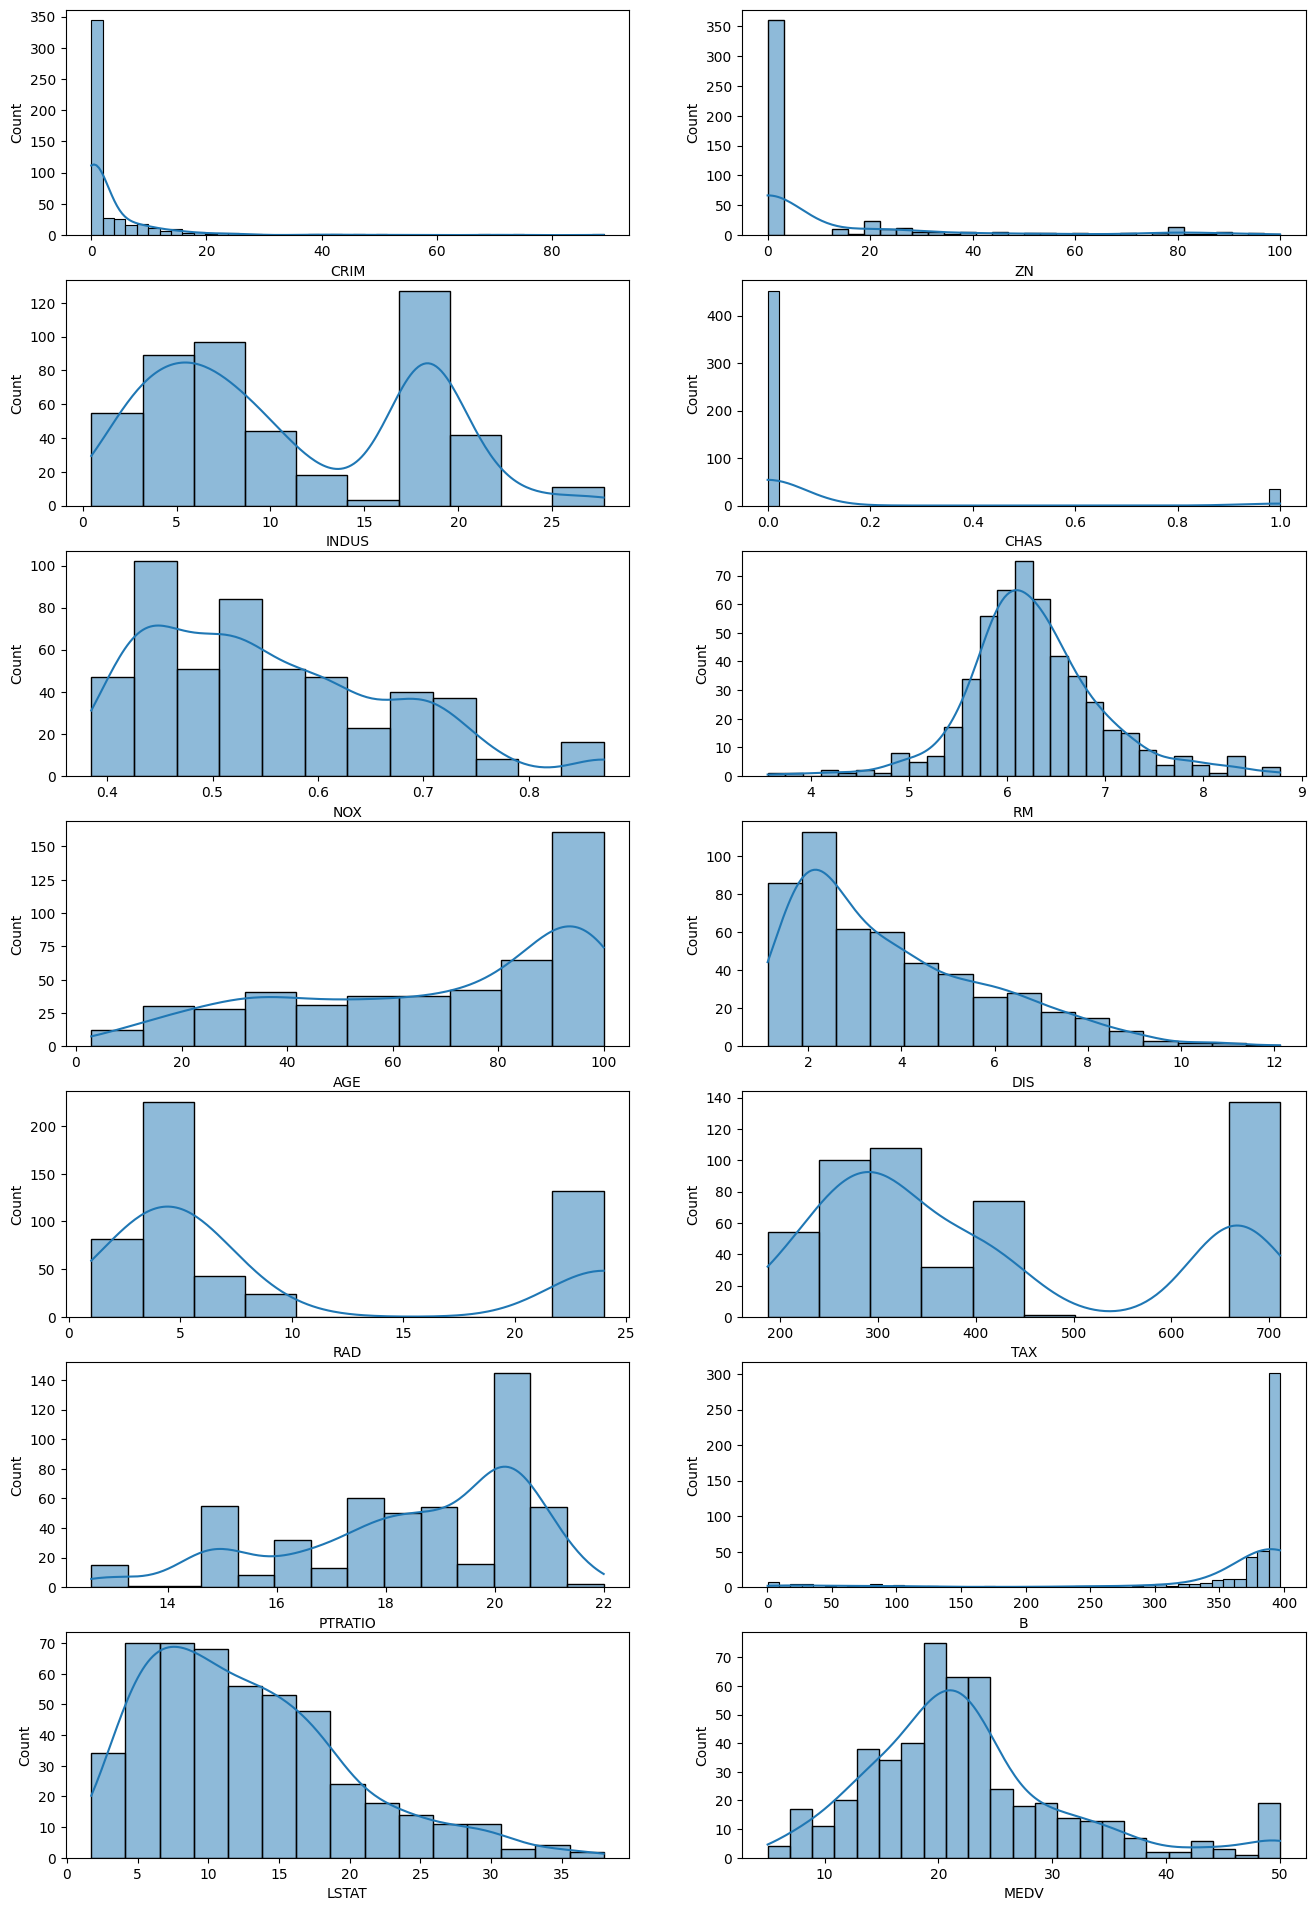

In [10]:

pos = 1
fig = plt.figure(figsize=(16,24))
for i in data.columns:
    ax = fig.add_subplot(7,2, pos)
    pos = pos + 1
    sns.histplot(data[i], ax=ax, kde=True)

Similar information can be read on the boxplot. The distribution data is not as detailed, but the chart is compact. In addition, the outliers can be read very nicely.

That is why it appears very often in technical articles when you need to present data in a small space.

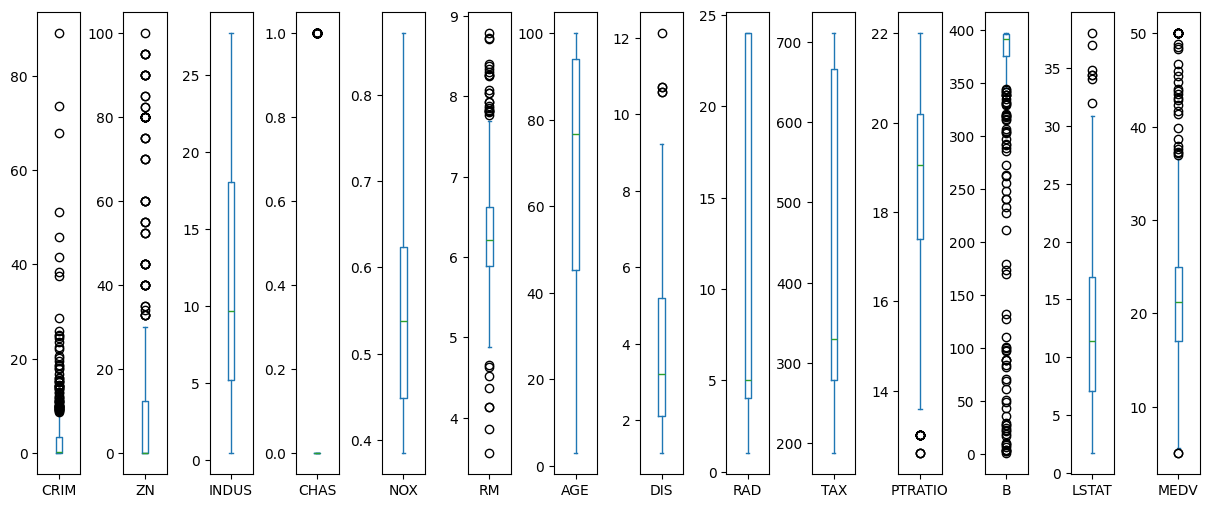

In [11]:
data.plot(
    kind='box', 
    subplots=True, 
    sharey=False, 
    figsize=(15, 6)
)
plt.subplots_adjust(wspace=1) 
plt.show()

## Relationships between variables
There are many variables in datasets. Often there is a relationship between them. If one variable changes, another variable is likely to change.

These relationships may or may not be causal. Sometimes it can be a coincidence. 

That's why it's a good idea to try to decipher these relationships. 
* Uncovering relationships - see if a change in one variable is related to a change in another (e.g. height and weight).
* Redundancy - strongly correlated variables often carry the same information → it is not necessary to have both when modelling.
* Prediction - if one variable is strongly correlated with another, we can use it to predict (e.g. age ↔ income).
* Hidden relationships - weak or no correlation may mean that the relationship is non-linear or influenced by other factors.

There are a number of methods to detect dependencies.

We start by creating graphs for all combinations of the two functions.

The human brain is trained to look for patterns. We may see a relationship at first glance. 

Usually we look for a graph shape that shows a mathematical curve (line, parabola, hyperbola, etc.).

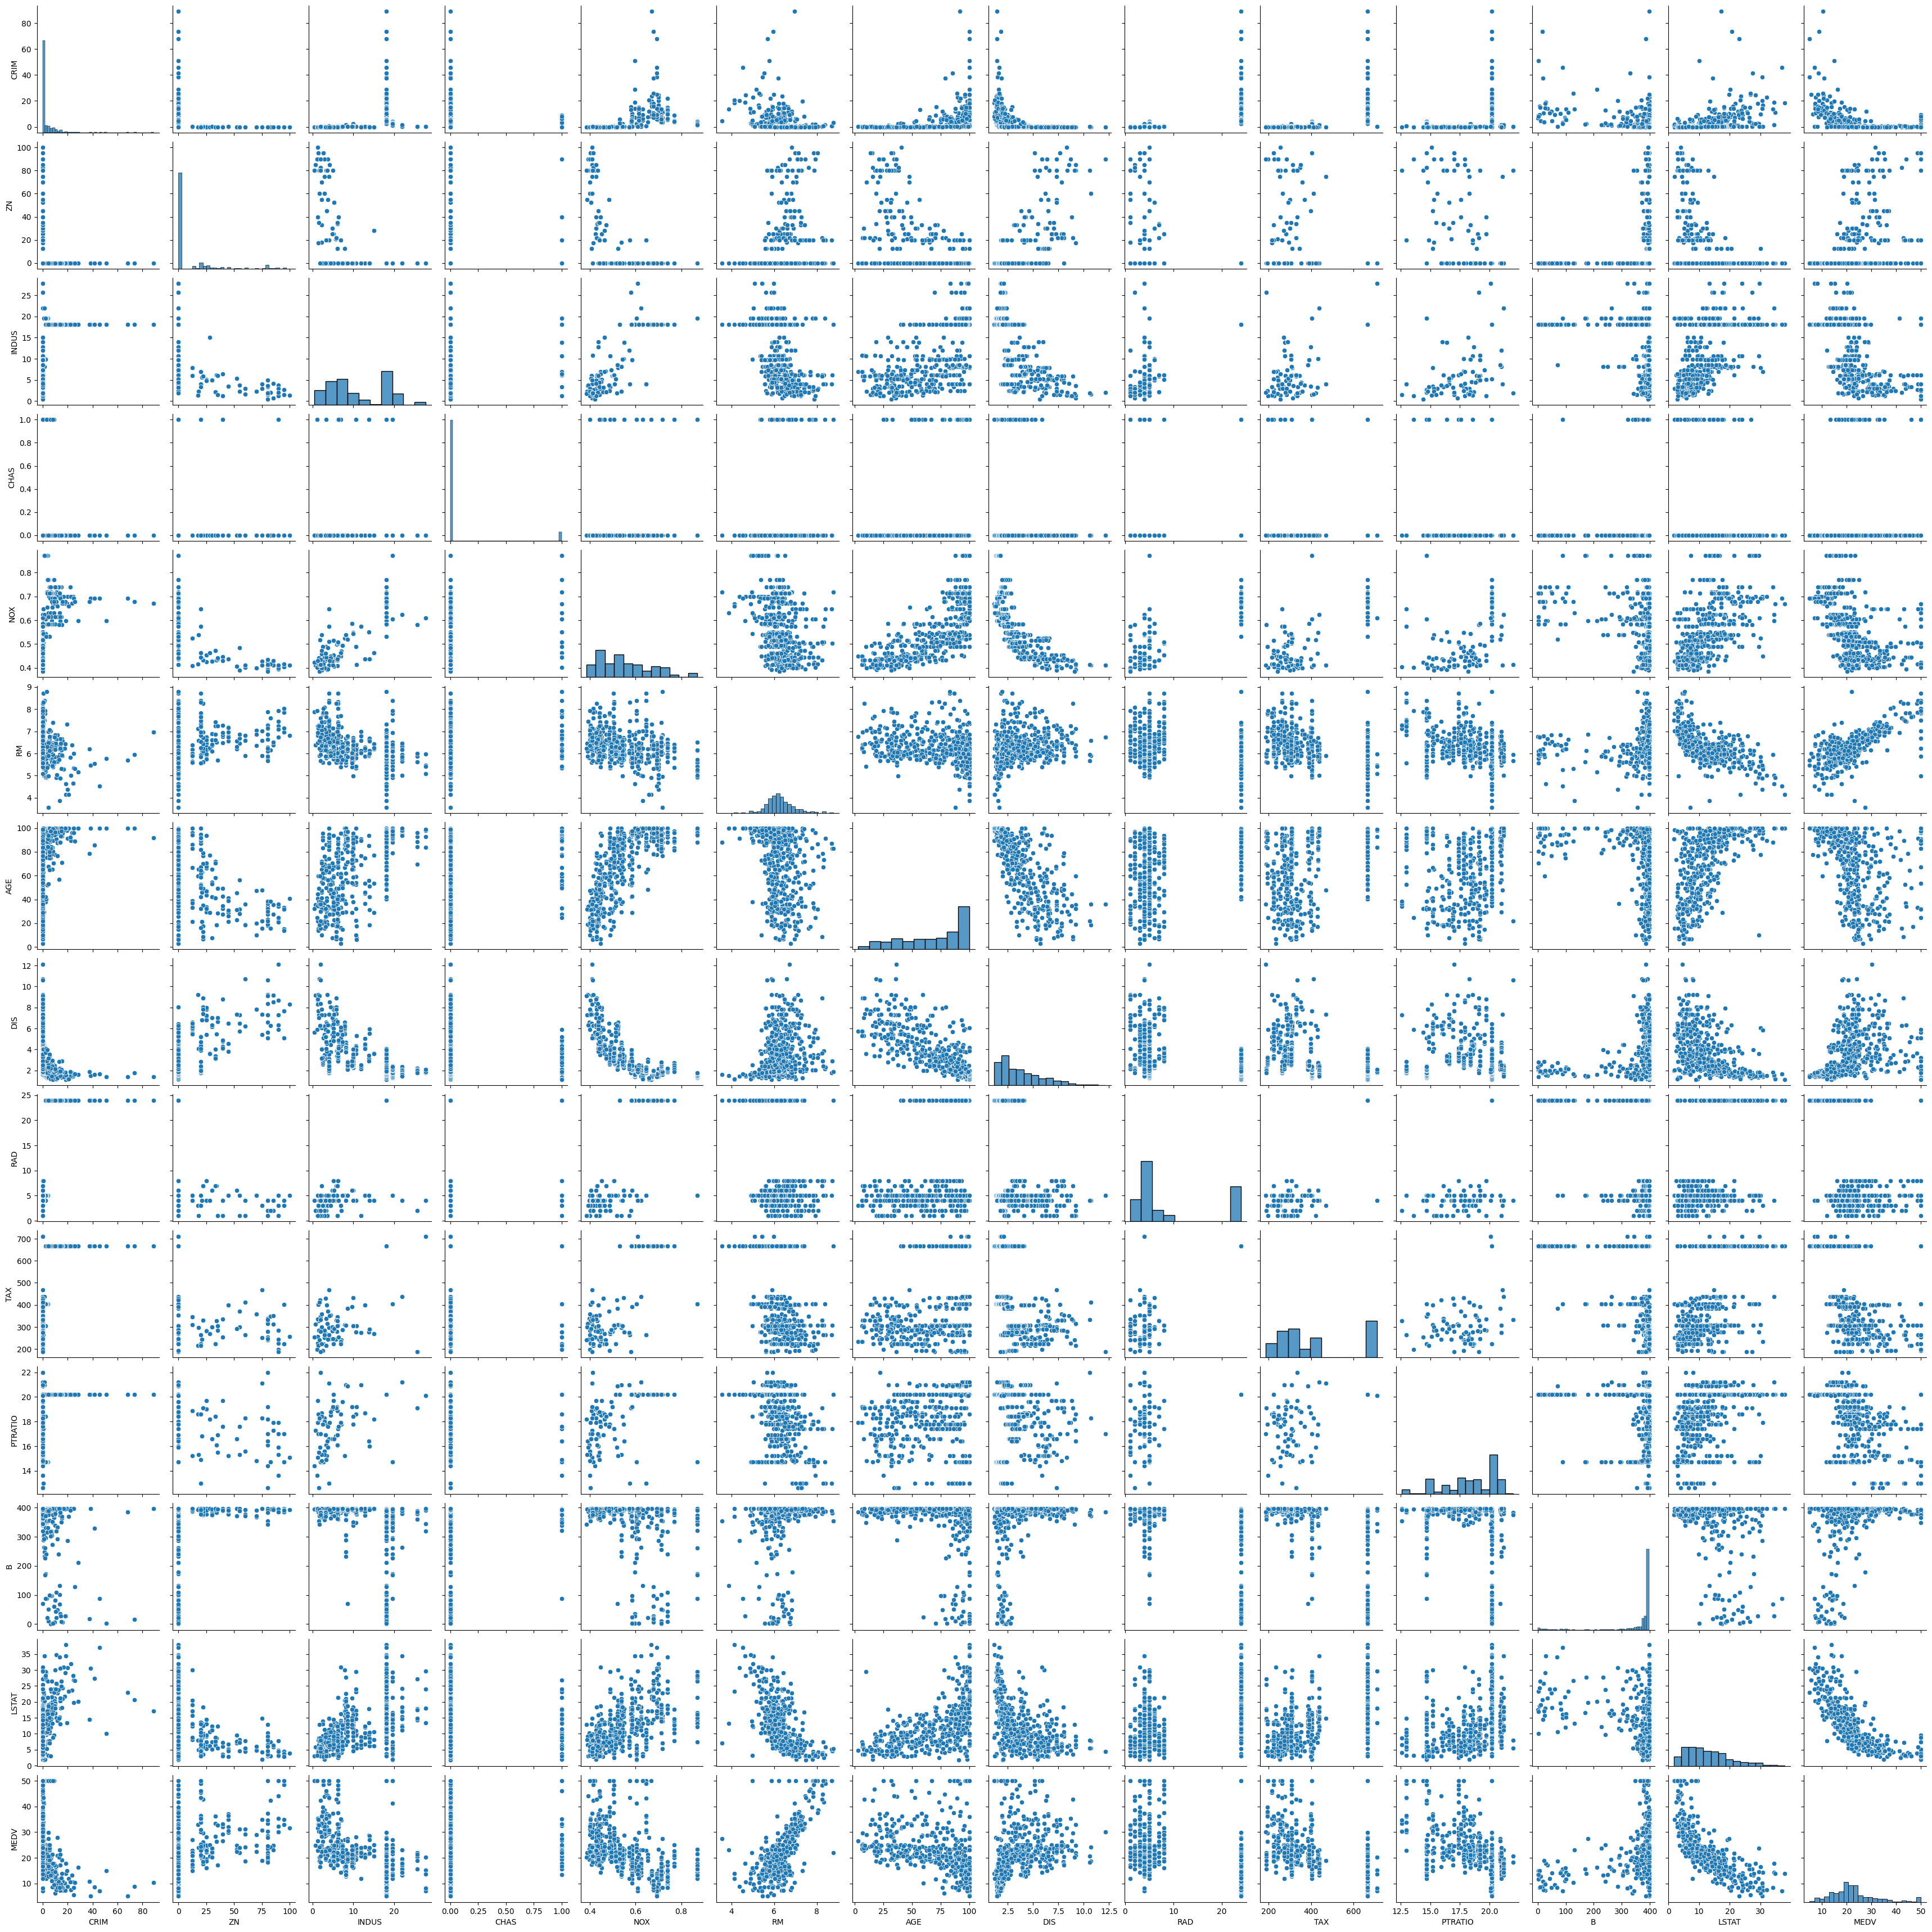

In [12]:
sns.pairplot(data)

The graphs show that there is some direct art between RM, LSTAT and MEDV.

* RM - average number of rooms per apartment (input variable)
* LSTAT - percentage of lower population (input variable)
* MDEV - median value of owner-occupied dwellings in $1,000 (output variable)

The relationships between variables were estimated by eye. But it can also be done exactically by correlation.

Correlation shows us how strongly and in which direction two (or more) variables are **linearly** dependent. Note some phenomena may not have a linear dependence, but another. For other types of relationships than linear, the correlation coefficient will not work.

Correlation coefficient (Pearson's r):
* Values from -1 to 1
* r ≈ 1 → strong positive linear dependence
* r ≈ -1 → strong negative linear dependence
* r ≈ 0 → no linear dependence (but may be non-linear)

In [13]:
corr=data.corr()
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.191178,0.401863,-0.054355,0.417130,-0.219150,0.354342,-0.374166,0.624765,0.580595,0.281110,-0.381411,0.444943,-0.391363
ZN,-0.191178,1.000000,-0.531871,-0.037229,-0.513704,0.320800,-0.563801,0.656739,-0.310919,-0.312371,-0.414046,0.171303,-0.414193,0.373136
INDUS,0.401863,-0.531871,1.000000,0.059859,0.764866,-0.390234,0.638431,-0.711709,0.604533,0.731055,0.390954,-0.360532,0.590690,-0.481772
CHAS,-0.054355,-0.037229,0.059859,1.000000,0.075097,0.104885,0.078831,-0.093971,0.001468,-0.032304,-0.111304,0.051264,-0.047424,0.181391
NOX,0.417130,-0.513704,0.764866,0.075097,1.000000,-0.302188,0.731548,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.582641,-0.427321
RM,-0.219150,0.320800,-0.390234,0.104885,-0.302188,1.000000,-0.247337,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.614339,0.695360
AGE,0.354342,-0.563801,0.638431,0.078831,0.731548,-0.247337,1.000000,-0.744844,0.458349,0.509114,0.269226,-0.275303,0.602891,-0.394656
DIS,-0.374166,0.656739,-0.711709,-0.093971,-0.769230,0.205246,-0.744844,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.493328,0.249929
RAD,0.624765,-0.310919,0.604533,0.001468,0.611441,-0.209847,0.458349,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.479541,-0.381626
TAX,0.580595,-0.312371,0.731055,-0.032304,0.668023,-0.292048,0.509114,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.536110,-0.468536


A strong direct or indirect correlation may indicate a relationship between input parameters.
This can help us in choosing the input parameters of the model.

Sometimes it can be useful to show correlations using a heatmap.
Especially if the correlation matrix is large, the colours can help us to orient ourselves.

<Axes: >

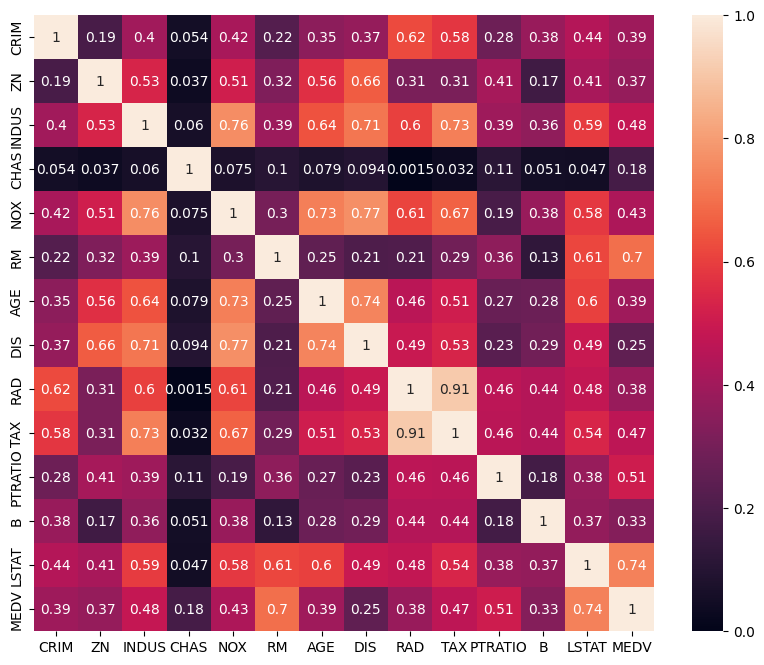

In [14]:
plt.figure(figsize = (10,8))
sns.heatmap(corr.abs(), annot=True, vmin=0, vmax=1)

For example, the CHAS column (Charles River dummy variable) has no relationship to other elements.

In contrast, the columns LSTAT, TAX, RAD, NOX, INDUS have relationships to other columns.

The next class will attempt to create a statistical model that will estimate the MEDV property price based on the input parameters.

We will use linear regression to do this.

Focusing on the MEDV row, suitable input parameters may be the RM, LSTAT columns.

## Data editing and standardization

### Data cleaning

Some columns contain NULL data. We need to decide how to solve this problem. 
* Incomplete rows can be removed from the data file.
* Problem columns should not be model input parameters.
* Records with extreme values can be excluded from the dataset. For example, because they are measurement errors.

In [15]:
print (data.isnull().sum())

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64


In [16]:
data=data.dropna()

Sometimes it is useful to discard data with outliers. 
We remove rows from the dataset where the median house value is greater than 50.

In [17]:
data = data[~(data['MEDV'] >= 40.0)]

### Data standardization

Each function has a different mean and standard deviation.

It is a good practice to standardize the data before entering it into a mathematical model.

Reasons:
* to prevent some variables from dominating the model.
* can help machine learning models converge more quickly
* can make it easier to interpret the coefficients of a machine learning model

Calculation:
* x_new = (x - mean) / standard_deviation
* mean = sum of (x) / number of (x)
* standard_deviation = sqrt( sum ( (x - mean)^2 ) / count (x))

We can do the standardization manually. We calculate the mean and standard deviation and adjust the data. 

In [18]:
data["AGE"].mean()

np.float64(69.34070080862534)

In [19]:
data["AGE"].std()

np.float64(27.749956679673506)

In [20]:
data['AGE_STD'] = (data['AGE'] - data['AGE'].mean()) / data['AGE'].std()
data['LSTAT_STD'] = (data['LSTAT'] - data['LSTAT'].mean()) / data['LSTAT'].std()

We can look at the distribution charts to see how the original data has changed to the new data.

The shape of the graph is identical, but the standardized graph is relatively centered around the value 0.

<Axes: xlabel='AGE_STD', ylabel='Count'>

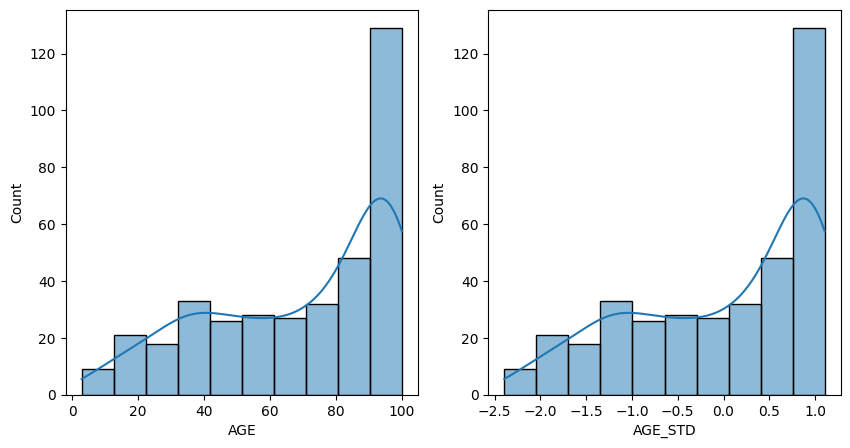

In [21]:
fig = plt.figure (figsize=(10, 5))
axes = fig.subplots (1, 2)           
ax1 = axes[0]
ax2 = axes[1]
sns.histplot(data['AGE'],ax=ax1, kde=True)
sns.histplot(data['AGE_STD'],ax=ax2, kde=True)

Same for LSTAT

<Axes: xlabel='LSTAT_STD', ylabel='Count'>

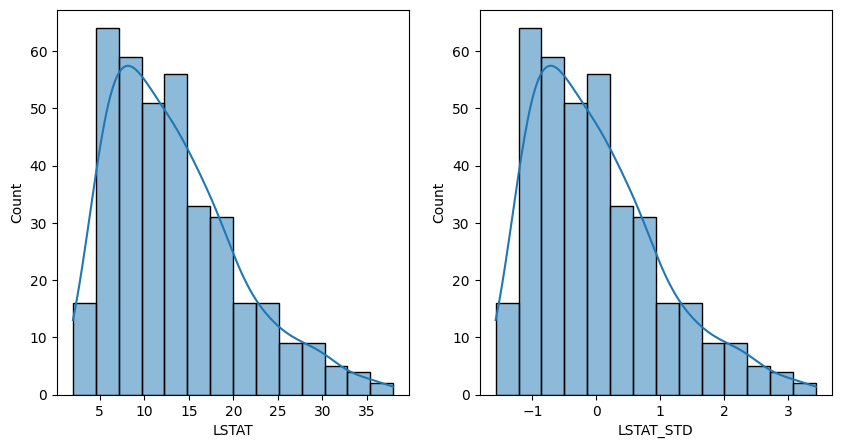

In [22]:
fig = plt.figure (figsize=(10, 5))
axes = fig.subplots (1, 2)           
ax1 = axes[0]
ax2 = axes[1]
sns.histplot(data['LSTAT'],ax=ax1, kde=True)
sns.histplot(data['LSTAT_STD'],ax=ax2, kde=True)